In [94]:
import pandas as pd

In [95]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [96]:
df.shape

(21613, 21)

In [97]:
names = list(df.columns)
names

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [98]:
# g = df[names[-1]].value_counts()
# g.plot.bar(rot=0)

In [99]:
types = df.dtypes
types

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [100]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in range(len(types)):
    if types[i] == 'object':
        LE.fit_transform(df[names[i]])
        df[names[i]] = LE.transform(df[names[i]])

In [101]:
data = df.values
data[:2]

array([[ 7.12930052e+09,  1.64000000e+02,  2.21900000e+05,
         3.00000000e+00,  1.00000000e+00,  1.18000000e+03,
         5.65000000e+03,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.00000000e+00,  7.00000000e+00,
         1.18000000e+03,  0.00000000e+00,  1.95500000e+03,
         0.00000000e+00,  9.81780000e+04,  4.75112000e+01,
        -1.22257000e+02,  1.34000000e+03,  5.65000000e+03],
       [ 6.41410019e+09,  2.20000000e+02,  5.38000000e+05,
         3.00000000e+00,  2.25000000e+00,  2.57000000e+03,
         7.24200000e+03,  2.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.00000000e+00,  7.00000000e+00,
         2.17000000e+03,  4.00000000e+02,  1.95100000e+03,
         1.99100000e+03,  9.81250000e+04,  4.77210000e+01,
        -1.22319000e+02,  1.69000000e+03,  7.63900000e+03]])

In [102]:
x = df.drop(columns=['price']).values
y = df['price'].values
x.shape,y.shape

((21613, 20), (21613,))

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled[0]

array([0.72010308, 0.44204852, 0.09090909, 0.125     , 0.06716981,
       0.00310751, 0.        , 0.        , 0.        , 0.5       ,
       0.5       , 0.09758772, 0.        , 0.47826087, 0.        ,
       0.89393939, 0.57149751, 0.21760797, 0.16193426, 0.00574235])

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, random_state = 42, test_size=0.25)

## KNN

In [105]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [106]:
Y_predict = KNN.predict(X_test)

In [107]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)

5399


In [108]:
Y_test.shape

(5404,)

### Evaluating Model

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
knn_mae=int(mean_absolute_error(Y_test, Y_predict))
knn_mse=int(mean_squared_error(Y_test, Y_predict))
knn_rmse=int(math.sqrt(mean_squared_error(Y_test, Y_predict)))

## Linear regression

In [110]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(X_train,Y_train)
LR.score(X_test,Y_test)

0.7058700391190363

In [111]:
Y_predict = LR.predict(X_test)

In [112]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)

5404


In [113]:
Y_test.shape

(5404,)

### Evaluating Model

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
LR_mae=int(mean_absolute_error(Y_test, Y_predict))
LR_mse=int(mean_squared_error(Y_test, Y_predict))
LR_rmse=int(math.sqrt(mean_squared_error(Y_test, Y_predict)))

# PLOTING

Text(0.5, 1.0, 'Linear Regression')

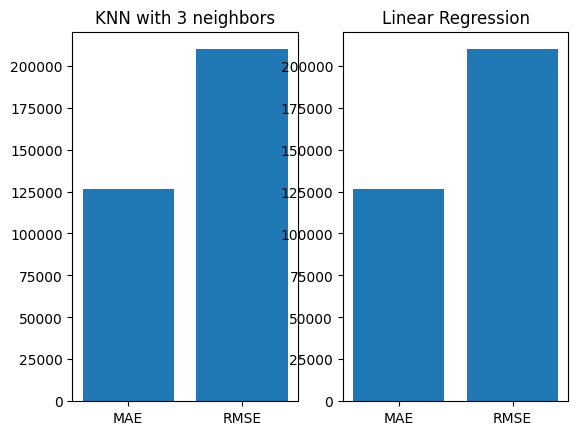

In [127]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['MAE','RMSE']

ax1 = plt.subplot(1, 2,1)
ax2 = plt.subplot(1, 2,2)


knn_values = [knn_mae,knn_rmse]

LR_values = [LR_mae,LR_rmse]

ax1.bar(labels,knn_values)
ax1.set_title('KNN with 3 neighbors')

ax2.bar(labels,LR_values)
ax2.set_title('Linear Regression')